In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from pathlib import Path
from collections import Counter

pd.set_option('max_columns', 2000)
pd.set_option('max_row', 200)

sns.set(style="white", font_scale=1.2)
plt.rcParams["font.family"] = "FreeSans"

def category_to_color(i):
    # 类别转换为颜色
    
    i = i.lower()
    if i == "fake" or i == "fake & extreme bias" or i == "fake &\n extreme bias":
        c = "#282828"
    elif i == "farRight" or i=="extreme bias right":
        c = "#4F0906"
    elif i == "right":
        c = "#8F100B"
    elif i == "leanRight" or i=="lean right" or i=="leaning right" or i == "right leaning":
        c = "#DB4742"
    elif i == "center":
        c = "#CFDB00"
    elif i == "leanLeft" or i=="lean left" or i=="leaning left" or i == "left leaning":
        c = "#4495DB"
    elif i == "left":
        c = "#0E538F"
    elif i == "farLeft" or i=="extreme bias left":
        c = "#082E4F"
    else:
        # c = "#D3D3D3"
        c = "#282828"
    return c


For the flow of users, you could compute two things:

1. the number of users in each category in 2016 and in 2020 (independently)

2. the flow of users from categories to categories (what you already did)

The you could you make a new flow plot where the size of each category is given by the number of users you find each year (1) and then you create the flows from categories to categories from (1) based on the proportions computed from (2).

It's a bit complicated to explain, so let me know if it's not clear.

## 分析所有用户的媒体类型

In [58]:
from pathlib import Path
from collections import Counter

# 4 分类
# simple_category = {
#     "farRight": "Fake & extreme bias",
#     "right": "Right",
#     "leanRight": "Right",
#     "center": "Center",
#     "leanLeft": "Left",
#     "left": "Left",
#     "farLeft": "Fake & extreme bias",
#     "fake": "Fake & extreme bias"
# }

# 6 分类
simple_category = {
    "farRight": "Fake & extreme bias",
    "right": "Right",
    "leanRight": "Right leaning",
    "center": "Center",
    "leanLeft": "Left leaning",
    "left": "Left",
    "farLeft": "Fake & extreme bias",
    "fake": "Fake & extreme bias"
}

users_2016 = {}
for file_name in Path("data/2016csv").glob("*.csv"):
    print(file_name)
    # category = file_name.name.split("_")[0]
    category = simple_category[file_name.name.split("_")[0]]
    for line in open(file_name):
        if line.startswith("tweet_id"):
            continue
        values = line.strip().split(",")
        tweet_id = values[0]
        user_id = int(values[1])

        if user_id not in users_2016:
            users_2016[user_id] = Counter()

        users_2016[user_id][category] += 1
print(len(users_2016))

users_2020 = {}
for file_name in Path("data/2020csv").glob("*.csv"):
    print(file_name)
    # category = file_name.name.split("_")[0]
    category = simple_category[file_name.name.split("_")[0]]
    for line in open(file_name):
        values = line.strip().split(",")
        tweet_id = values[0]
        user_id = int(values[1])

        if user_id not in users_2020:
            users_2020[user_id] = Counter()

        users_2020[user_id][category] += 1

print(len(users_2020))

data\2016csv\center_user_list.csv
data\2016csv\fake_user_list.csv
data\2016csv\farLeft_user_list.csv
data\2016csv\farRight_user_list.csv
data\2016csv\leanLeft_user_list.csv
data\2016csv\leanRight_user_list.csv
data\2016csv\left_user_list.csv
data\2016csv\right_user_list.csv
2209289
data\2020csv\center_user_list.csv
data\2020csv\fake_user_list.csv
data\2020csv\farLeft_user_list.csv
data\2020csv\farRight_user_list.csv
data\2020csv\leanLeft_user_list.csv
data\2020csv\leanRight_user_list.csv
data\2020csv\left_user_list.csv
data\2020csv\right_user_list.csv
3650478


In [9]:
import json

# json.dump(users_2016, open("data/users2016_6c.json", "w"), indent=4)
# json.dump(users_2020, open("data/users2020_6c.json", "w"), indent=4)
# json.dump(users_2016, open("data/users2016_4c.json", "w"), indent=4)
# json.dump(users_2020, open("data/users2020_4c.json", "w"), indent=4)

users_2016 = json.load(open("data/users2016_6c.json"))
users_2020 = json.load(open("data/users2020_6c.json"))
# users_2016 = json.load(open("data/users2016_4c.json"))
# users_2020 = json.load(open("data/users2020_4c.json"))

# 关键点，由公式计算而得

1. 获取users_2016和users_2020
2. 判断每个用户的类型
3. 计算flow
4. 画图flow

In [6]:
# 四类或六类

from collections import defaultdict

users_2016_prop = defaultdict(
    lambda: {
        "Center": 0,
        "Fake & extreme bias": 0,
        "Left leaning": 0, # 可以注释
        "Right leaning": 0, # 可以注释
        "Left": 0,
        "Right": 0,
    }
)

abandon_num = 0
for u, c in users_2016.items():
    _sum = sum(c.values())
    if _sum <= 0:
        continue
    for _ca, it_c in c.items():
        users_2016_prop[u][_ca] = round(it_c / _sum, 3)
    # print(users_2016[u])

# 判断类型，最大的那一类
users_2016_category = {}

for u, v in users_2016_prop.items():
    # 判断最大和次大不能一样
    max_c = max(v, key=v.get)
    max_v = v.pop(max_c)
    max_c2 = max(v, key=v.get)

    if max_v > v[max_c2]:
        users_2016_category[u] = max_c 
    else:
        abandon_num += 1
print("abandon:", abandon_num)

abandon_num = 0
users_2020_prop = defaultdict(
    lambda: {
        "Center": 0,
        "Fake & extreme bias": 0,
        "Left leaning": 0, # 可以注释
        "Right leaning": 0, # 可以注释
        "Left": 0,
        "Right": 0,
    }
)

for u, c in users_2020.items():
    _sum = sum(c.values())
    if _sum <= 0:
        continue
    for _ca, it_c in c.items():
        users_2020_prop[u][_ca] = round(it_c / _sum, 3)

# 判断类型，最大的那一类

# users_2020_category = {u: max(v, key=v.get) for u, v in users_2020_prop.items()}

users_2020_category = {}

for u, v in users_2020_prop.items():
    # 判断最大和次大不能一样
    max_c = max(v, key=v.get)
    max_v = v.pop(max_c)
    max_c2 = max(v, key=v.get)

    if max_v > v[max_c2]:
        users_2020_category[u] = max_c
    else:
        abandon_num += 1
print("abandon:", abandon_num)

users_counter_cat_2016 = Counter(users_2016_category.values())
users_counter_cat_2020 = Counter(users_2020_category.values())
display(users_counter_cat_2016, sum(users_counter_cat_2016.values()))
display(users_counter_cat_2020, sum(users_counter_cat_2020.values()))

count_union = len(set(users_2016_category.keys()) & set(users_2020_category.keys()))
count_union

abandon: 280512
abandon: 401539


Counter({'Fake & extreme bias': 208335,
         'Right': 139754,
         'Left': 256662,
         'Center': 505295,
         'Left leaning': 772950,
         'Right leaning': 45781})

1928777

Counter({'Center': 319640,
         'Left leaning': 2006830,
         'Fake & extreme bias': 227690,
         'Right': 280639,
         'Left': 185058,
         'Right leaning': 229082})

3248939

422359

In [7]:
print(280512 / (280512 + 1928777))
print(422359 / (422359 + 3248939))

0.1269693552993746
0.11504350777300018


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
                      count
category                   
Fake & extreme bias  208335
Right                139754
Left                 256662
Center               505295
Left leaning         772950
Right leaning         45781
                       count
category                    
Center                319640
Left leaning         2006830
Fake & extreme bias   227690
Right                 280639
Left                  185058
Right leaning         229082


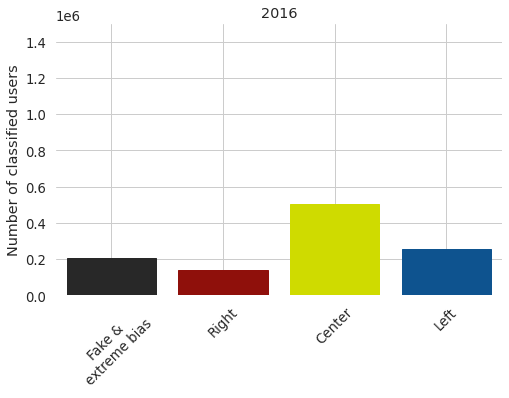

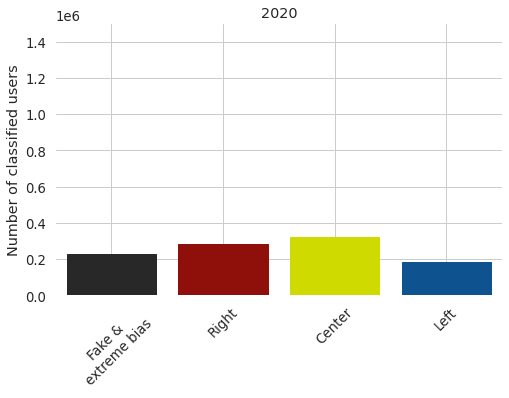

In [5]:
# 画数量图
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
plt.rcParams["font.family"] = "FreeSans"

pd.set_option('max_columns', 2000)
pd.set_option('max_row', 200)

sns.set(style="white", font_scale=1.2)
plt.rcParams["font.family"] = "FreeSans"
# f, ax = plt.subplots(1, 2)

figure = plt.figure(figsize=(8, 5))
# colors = ["#282828", "#4F0906", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F", "#082E4F"]
# colors = ["#282828", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F"]
colors = ["#282828", "#8F100B", "#CFDB00", "#0E538F"]

df = pd.DataFrame({"category": users_counter_cat_2016.keys(), "count": users_counter_cat_2016.values()}).set_index("category")
print(df)
df = df.rename(index={"Fake & extreme bias": "Fake &\n extreme bias"})
# df = df.rename(index={"farRight": "extreme bias right", "farLeft": "extreme bias left", "leanRight": "lean right", "leanLeft": "lean left"})
# df = df.reindex(["fake", "extreme bias right", "right", "lean right", "center", "lean left", "left", "extreme bias left"])
# df = df.reindex(["Fake &\n extreme bias", "Right", "Leaning right", "Center", "Leaning left", "Left"])
df = df.reindex(["Fake &\n extreme bias", "Right", "Center", "Left"])

i = 0
ax = sns.barplot(x=df.index, y=df["count"])
for bar_container in ax.containers:
    for bar in bar_container:
        bar.set_color(colors[i])
        i += 1
for key, spine in ax.spines.items():
    spine.set_visible(False)

ax = plt.gca()  # 获取当前图像的坐标轴信息
# ax.xaxis.get_major_formatter().set_powerlimits((0,1)) # 将坐标轴的base number设置为一位。
ax.yaxis.get_major_formatter().set_powerlimits((6,6)) # 将坐标轴的base number设置为一位。
ax.set_ylim(0, 1500000)

# plt.ylabel("Average increment of followers of influencers from 2016 to 2020")
plt.title("2016")
plt.xlabel("")
plt.ylabel("Number of classified users")

plt.xticks(rotation=45)
# plt.show()
plt.grid()
plt.savefig("fig/N_users_flow_2016.png", dpi=300, bbox_inches="tight")

# 2020
figure = plt.figure(figsize=(8, 5))
# colors = ["#282828", "#4F0906", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F", "#082E4F"]
# colors = ["#282828", "#8F100B", "#DB4742", "#CFDB00", "#4495DB", "#0E538F"]
colors = ["#282828", "#8F100B", "#CFDB00", "#0E538F"]

df = pd.DataFrame({"category": users_counter_cat_2020.keys(), "count": users_counter_cat_2020.values()}).set_index("category")
print(df)
df = df.rename(index={"Fake & extreme bias": "Fake &\n extreme bias"})
# df = df.reindex(["fake", "extreme bias right", "right", "lean right", "center", "lean left", "left", "extreme bias left"])
# df = df.reindex(["Fake &\n extreme bias", "Right", "Leaning right", "Center", "Leaning left", "Left"])
df = df.reindex(["Fake &\n extreme bias", "Right", "Center", "Left"])

i = 0
ax = sns.barplot(x=df.index, y=df["count"])
for bar_container in ax.containers:
    for bar in bar_container:
        bar.set_color(colors[i])
        i += 1
for key, spine in ax.spines.items():
    spine.set_visible(False)

ax = plt.gca()  # 获取当前图像的坐标轴信息
# ax.xaxis.get_major_formatter().set_powerlimits((0,1)) # 将坐标轴的base number设置为一位。
ax.yaxis.get_major_formatter().set_powerlimits((6,6)) # 将坐标轴的base number设置为一位。
ax.set_ylim(0, 1500000)

# plt.ylabel("Average increment of followers of influencers from 2016 to 2020")
plt.xlabel("")
plt.ylabel("Number of classified users")
plt.title("2020")

plt.xticks(rotation=45)
# plt.show()
plt.grid()
plt.savefig("fig/N_users_flow_2020.png", dpi=300, bbox_inches="tight")

In [99]:
# 判断完成，计算flow的变化

users_flow_cat = users_2016_category.copy()

for u, c in users_2020_category.items():
    if u not in users_flow_cat:
        users_flow_cat[u] = "None to " + c
    else:
        users_flow_cat[u] =  users_flow_cat[u] + " to " + c

for u, v in users_flow_cat.items():
    if v.find("to") == -1:
        users_flow_cat[u] = users_flow_cat[u] + " to None"

users_flow_cat = Counter(users_flow_cat.values())
users_flow_cat = sorted(users_flow_cat.items())
users_flow_cat

# 保存成csv
from collections import defaultdict

media_list = [
    "Fake & extreme bias",
    "Right",
    "Right leaning",
    "Center",
    "Left leaning",
    "Left",
    "None"
]

df = {}

for m_2016 in media_list:
    df[m_2016] = {}
    for m_2020 in media_list:
        df[m_2016][m_2020] = 0

for k, v in users_flow_cat:
    m_2016, m_2020 = k.split(" to ")
    df[m_2020][m_2016] = v

df = pd.DataFrame(df)
# df.to_csv("data/PNAS_4c.csv")
df.to_csv("data/PNAS_6c.csv")

In [81]:
# df = pd.read_csv("data/PNAS_flow2.csv", index_col="#")
# 直接载入计算好的四类
# df = pd.read_csv("data/PNAS_flow3.csv", index_col="#")
# df

# 直接载入计算好的6类
df = pd.read_csv("data/PNAS_6c.csv", index_col="#")
df

,Fake & extreme bias,Right,Right leaning,Center,Left leaning,Left,None
#,,,,,,,
Fake & extreme bias,19846,6758,803,2877,2382,546,194478
Right,17170,10893,705,3946,3001,543,244381
Right leaning,4002,3353,994,3313,4140,1066,212214
Center,1484,1142,663,9425,12137,3568,291221
Left leaning,6046,4950,3543,63597,160241,46349,1722104
Left,526,366,263,4337,10844,6540,162182
None,159261,112292,38810,417800,580205,198050,0


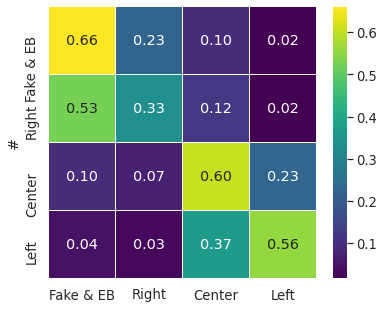

In [11]:
df["Fake & EB"] = df["Fake & extreme bias"]
# df["Left"] = df["Left"] + df["Leaning left"]
# df["Right"] = df["Right"] + df["Leaning right"]
df

# df.loc["fake & extreme bias"] = df.loc["fake"] + df.loc["extreme bias left"] + df.loc["extreme bias right"]
df.loc["Fake & EB"] = df.loc["Fake & extreme bias"]
# df.loc["Left"] = df.loc["Left"] + df.loc["Leaning left"]
# df.loc["Right"] = df.loc["Right"] + df.loc["Leaning right"]
df

df = df.loc[["Fake & EB", "Right", "Center", "Left"]]
df = df[["Fake & EB", "Right", "Center", "Left"]]
df

df_prop = df.div(df.sum(axis=1), axis=0)
df_prop

fig = plt.figure(figsize=(6, 5))
# sns.heatmap(df, annot=True, linewidths=.5, cmap="viridis")
sns.heatmap(df_prop, annot=True, fmt=".2f", linewidths=.5, cmap="viridis")
plt.savefig("fig/flow-heatmap-based-on-2016.png", dpi=300, bbox_inches='tight')

In [82]:
flow_list_dict = []

for i, row in df.iterrows():
    for j, v in row.iteritems():
        # print(i, j, v)
        if i == "None" or j == "None":
            continue

        c = category_to_color(i)
        
        flow_list_dict.append(
            {
                "source": i + "(2016)",
                "target": j + "(2020)",
                # "type": i,
                "color": c,
                "value": v,
            }
        )

df_flow = pd.DataFrame(flow_list_dict)
# df_flow.to_csv("df_flow.csv")
df_flow

,source,target,color,value
0,Fake & extreme bias(2016),Fake & extreme bias(2020),#282828,19846
1,Fake & extreme bias(2016),Right(2020),#282828,6758
2,Fake & extreme bias(2016),Right leaning(2020),#282828,803
3,Fake & extreme bias(2016),Center(2020),#282828,2877
4,Fake & extreme bias(2016),Left leaning(2020),#282828,2382
5,Fake & extreme bias(2016),Left(2020),#282828,546
6,Right(2016),Fake & extreme bias(2020),#8F100B,17170
7,Right(2016),Right(2020),#8F100B,10893
8,Right(2016),Right leaning(2020),#8F100B,705
9,Right(2016),Center(2020),#8F100B,3946


In [64]:
from floweaver import *
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

# Set the default size to fit the documentation better.
layout = Layout(width="800", height="800")

# order = [
#     ["Fake & extreme bias(2016)", "Right(2016)", "Leaning right(2016)", "Center(2016)", "Leaning left(2016)", "Left(2016)"],
#     ["Fake & extreme bias(2020)", "Right(2020)", "Leaning right(2020)", "Center(2020)", "Leaning left(2020)", "Left(2020)"],
# ]

order = [
    # ["Fake &\n extreme bias(2016)", "Right(2016)", "Center(2016)", "Left(2016)"],
    # ["Fake &\n extreme bias(2020)", "Right(2020)", "Center(2020)", "Left(2020)"],
    ["Fake & extreme bias(2016)", "Right(2016)", "Center(2016)", "Left(2016)"],
    ["Fake & extreme bias(2020)", "Right(2020)", "Center(2020)", "Left(2020)"],
]

# sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=120, right=120), layout=layout)

sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=180, right=180), layout=layout, order=order)
sw 

SankeyWidget(layout=Layout(height='800', width='800'), links=[{'source': 'Fake & extreme bias(2016)', 'target'…

In [65]:
# VIP ~~~~~~~~~~~~~~~~~~~~~

# 2016 formula
df = pd.read_csv("data/PNAS_4c.csv", index_col="#")
# df = pd.read_csv("data/PNAS_6c.csv", index_col="#")

# print(df)
# df["Fake &\n extreme bias"] = df["Fake & extreme bias"]
# df["Left"] = df["Left"] + df["Leaning left"]
# df["Right"] = df["Right"] + df["Leaning right"]
# df

# df.loc["fake & extreme bias"] = df.loc["fake"] + df.loc["extreme bias left"] + df.loc["extreme bias right"]
# df.loc["Fake &\n extreme bias"] = df.loc["Fake & extreme bias"]
# df.loc["Left"] = df.loc["Left"] + df.loc["Leaning left"]
# df.loc["Right"] = df.loc["Right"] + df.loc["Leaning right"]
# df

df = df.loc[["Fake & extreme bias", "Right", "Center", "Left"]]
df = df[["Fake & extreme bias", "Right", "Center", "Left"]]
# df = df.loc[["Fake & extreme bias", "Right", "Center", "Left"]]
# df = df[["Fake & extreme bias", "Right", "Center", "Left"]]
display(df)

# users_counter_cat_2016 = Counter(users_2016_category.values())
# users_counter_cat_2020 = Counter(users_2020_category.values())
# print(users_counter_cat_2016)
# print(users_counter_cat_2020)
# count_union = len(set(users_2016_category.keys()) & set(users_2020_category.keys()))

users_2016_fake = set([u for u, v in users_2016_category.items() if v == "Fake & extreme bias"])
# print("user 2016 fake:", len(users_2016_fake))
S_fake = len(users_2016_fake & set(users_2020_category.keys()))

users_2016_right = set([u for u, v in users_2016_category.items() if v == "Right"])
S_right = len(users_2016_right & set(users_2020_category.keys()))

users_2016_center = set([u for u, v in users_2016_category.items() if v == "Center"])
S_center = len(users_2016_center & set(users_2020_category.keys()))

users_2016_left = set([u for u, v in users_2016_category.items() if v == "Left"])
S_left = len(users_2016_left & set(users_2020_category.keys()))


print(S_fake, S_right, S_center, S_left)

df_prop1 = df.copy()
# print(df.sum(), count_union)
# print(df_prop1)

df_prop1[df_prop1.index=="Fake & extreme bias"] = df_prop1[df_prop1.index=="Fake & extreme bias"] * users_counter_cat_2016["Fake & extreme bias"] / S_fake
df_prop1[df_prop1.index=="Right"] = df_prop1[df_prop1.index=="Right"] * users_counter_cat_2016["Right"] / S_right
df_prop1[df_prop1.index=="Center"] = df_prop1[df_prop1.index=="Center"] * users_counter_cat_2016["Center"] / S_center
df_prop1[df_prop1.index=="Left"] = df_prop1[df_prop1.index=="Left"] * users_counter_cat_2016["Left"] / S_left

display(df_prop1)

# df_prop1 = df_prop1 / count_union
# print(df_prop1)
display(df_prop1.sum(axis=1))
display(df_prop1.sum())

flow_list_dict = []

for i, row in df_prop1.iterrows():
    for j, v in row.iteritems():
        # print(i, j, v)
        if i == "None" or j == "None":
            continue

        c = category_to_color(i)
        
        if i == "Fake & extreme bias":
            i = "Fake &\n extreme bias"
        if j == "Fake & extreme bias":
            j = "Fake &\n extreme bias"

        flow_list_dict.append(
            {
                "source": i + " ",
                "target": j + "",
                # "type": i,
                "color": c,
                "value": v,
            }
        )

df_flow = pd.DataFrame(flow_list_dict)
df_flow.to_csv("data/df_flow-2016-4c.csv", index=None)
display(df_flow)

df_prop1.to_csv("data/flow-formula-2016-4c.csv")
df_prop1

,Fake & extreme bias,Right,Center,Left
#,,,,
Fake & extreme bias,14226,6519,2138,2772
Right,26716,21976,7984,11117
Center,1290,1825,8450,16503
Left,6007,9839,61825,267530


48239 40159 80397 297922


,Fake & extreme bias,Right,Center,Left
#,,,,
Fake & extreme bias,59008.748482,27040.491449,8868.318871,1.149812e+04
Right,131734.580941,108361.998456,39368.501805,5.481709e+04
Center,7736.726744,10945.369230,50678.558901,9.897613e+04
Left,22694.681584,37172.127869,233577.274673,1.010739e+06


#
Fake & extreme bias    1.064157e+05
Right                  3.342822e+05
Center                 1.683368e+05
Left                   1.304183e+06
dtype: float64

Fake & extreme bias    2.211747e+05
Right                  1.835200e+05
Center                 3.324927e+05
Left                   1.176030e+06
dtype: float64

,source,target,color,value
0,Fake &\n extreme bias,Fake &\n extreme bias,#282828,5.900875e+04
1,Fake &\n extreme bias,Right,#282828,2.704049e+04
2,Fake &\n extreme bias,Center,#282828,8.868319e+03
3,Fake &\n extreme bias,Left,#282828,1.149812e+04
4,Right,Fake &\n extreme bias,#8F100B,1.317346e+05
5,Right,Right,#8F100B,1.083620e+05
6,Right,Center,#8F100B,3.936850e+04
7,Right,Left,#8F100B,5.481709e+04
8,Center,Fake &\n extreme bias,#CFDB00,7.736727e+03
9,Center,Right,#CFDB00,1.094537e+04


,Fake & extreme bias,Right,Center,Left
#,,,,
Fake & extreme bias,59008.748482,27040.491449,8868.318871,1.149812e+04
Right,131734.580941,108361.998456,39368.501805,5.481709e+04
Center,7736.726744,10945.369230,50678.558901,9.897613e+04
Left,22694.681584,37172.127869,233577.274673,1.010739e+06


In [100]:
# VIP ~~~~~~~~~~~~~~~~~~~~~

# 2016 formula
df = pd.read_csv("data/PNAS_6c.csv", index_col="#")

df = df.loc[["Fake & extreme bias", "Right", "Right leaning", "Center", "Left leaning", "Left"]]
df = df[["Fake & extreme bias", "Right", "Right leaning", "Center", "Left leaning", "Left"]]
# df = df.loc[["Fake & extreme bias", "Right", "Center", "Left"]]
# df = df[["Fake & extreme bias", "Right", "Center", "Left"]]
display(df)

users_2016_fake = set([u for u, v in users_2016_category.items() if v == "Fake & extreme bias"])
# print("user 2016 fake:", len(users_2016_fake))
S_fake = len(users_2016_fake & set(users_2020_category.keys()))

users_2016_right = set([u for u, v in users_2016_category.items() if v == "Right"])
S_right = len(users_2016_right & set(users_2020_category.keys()))

users_2016_center = set([u for u, v in users_2016_category.items() if v == "Center"])
S_center = len(users_2016_center & set(users_2020_category.keys()))

users_2016_left = set([u for u, v in users_2016_category.items() if v == "Left"])
S_left = len(users_2016_left & set(users_2020_category.keys()))

users_2016_right_leaning = set([u for u, v in users_2016_category.items() if v == "Right leaning"])
S_right_leaning = len(users_2016_right_leaning & set(users_2020_category.keys()))

users_2016_left_leaning = set([u for u, v in users_2016_category.items() if v == "Left leaning"])
S_left_leaning = len(users_2016_left_leaning & set(users_2020_category.keys()))

# print(S_fake, S_right, S_center, S_left)
# print(S_fake, S_right, S_center, S_left, S_right_leaning, S_left_leaning)

df_prop1 = df.copy()
# print(df.sum(), count_union)
# print(df_prop1)

df_prop1[df_prop1.index=="Fake & extreme bias"] = df_prop1[df_prop1.index=="Fake & extreme bias"] * users_counter_cat_2016["Fake & extreme bias"] / S_fake
df_prop1[df_prop1.index=="Right"] = df_prop1[df_prop1.index=="Right"] * users_counter_cat_2016["Right"] / S_right
df_prop1[df_prop1.index=="Center"] = df_prop1[df_prop1.index=="Center"] * users_counter_cat_2016["Center"] / S_center
df_prop1[df_prop1.index=="Left"] = df_prop1[df_prop1.index=="Left"] * users_counter_cat_2016["Left"] / S_left
df_prop1[df_prop1.index=="Right leaning"] = df_prop1[df_prop1.index=="Right leaning"] * users_counter_cat_2016["Right leaning"] / S_right_leaning
df_prop1[df_prop1.index=="Left leaning"] = df_prop1[df_prop1.index=="Left leaning"] * users_counter_cat_2016["Left leaning"] / S_left_leaning

display(df_prop1)

# df_prop1 = df_prop1 / count_union
# print(df_prop1)
# display(df_prop1.sum(axis=1))
# display(df_prop1.sum())

flow_list_dict = []

for i, row in df_prop1.iterrows():
    for j, v in row.iteritems():
        # print(i, j, v)
        if i == "None" or j == "None":
            continue

        c = category_to_color(i)
        
        if i == "Fake & extreme bias":
            i = "Fake &\n extreme bias"
        if j == "Fake & extreme bias":
            j = "Fake &\n extreme bias"

        flow_list_dict.append(
            {
                "source": i + " ",
                "target": j + "",
                # "type": i,
                "color": c,
                "value": v,
            }
        )

df_flow = pd.DataFrame(flow_list_dict)
df_flow.to_csv("data/df_flow-2016-6c.csv", index=None)
display(df_flow)

df_prop1.to_csv("data/flow-formula-2016-6c.csv", float_format="%.3f")
df_prop1

,Fake & extreme bias,Right,Right leaning,Center,Left leaning,Left
#,,,,,,
Fake & extreme bias,19846,17170,4002,1484,6046,526
Right,6758,10893,3353,1142,4950,366
Right leaning,803,705,994,663,3543,263
Center,2877,3946,3313,9425,63597,4337
Left leaning,2382,3001,4140,12137,160241,10844
Left,546,543,1066,3568,46349,6540


,Fake & extreme bias,Right,Right leaning,Center,Left leaning,Left
#,,,,,,
Fake & extreme bias,84252.687981,72892.202592,16989.784203,6300.059910,25667.225211,2233.040103
Right,34391.432962,55434.430194,17063.402593,5811.633093,25190.528731,1862.572427
Right leaning,5273.582413,4629.982069,6527.946349,4354.153350,23268.122651,1727.213169
Center,16615.049031,22788.663009,19133.005715,54430.600320,367280.943082,25046.738842
Left leaning,9552.345846,12034.672495,16602.313938,48672.049340,642601.784482,43486.833900
Left,2390.934484,2377.797482,4668.014946,15624.275165,202962.312120,28638.665802


,source,target,color,value
0,Fake &\n extreme bias,Fake &\n extreme bias,#282828,84252.687981
1,Fake &\n extreme bias,Right,#282828,72892.202592
2,Fake &\n extreme bias,Right leaning,#282828,16989.784203
3,Fake &\n extreme bias,Center,#282828,6300.059910
4,Fake &\n extreme bias,Left leaning,#282828,25667.225211
5,Fake &\n extreme bias,Left,#282828,2233.040103
6,Right,Fake &\n extreme bias,#8F100B,34391.432962
7,Right,Right,#8F100B,55434.430194
8,Right,Right leaning,#8F100B,17063.402593
9,Right,Center,#8F100B,5811.633093


,Fake & extreme bias,Right,Right leaning,Center,Left leaning,Left
#,,,,,,
Fake & extreme bias,84252.687981,72892.202592,16989.784203,6300.059910,25667.225211,2233.040103
Right,34391.432962,55434.430194,17063.402593,5811.633093,25190.528731,1862.572427
Right leaning,5273.582413,4629.982069,6527.946349,4354.153350,23268.122651,1727.213169
Center,16615.049031,22788.663009,19133.005715,54430.600320,367280.943082,25046.738842
Left leaning,9552.345846,12034.672495,16602.313938,48672.049340,642601.784482,43486.833900
Left,2390.934484,2377.797482,4668.014946,15624.275165,202962.312120,28638.665802


In [101]:
from floweaver import *
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

df_flow = pd.read_csv("data/df_flow-2016.csv")
print(df_flow)

# Set the default size to fit the documentation better.
layout = Layout(width="800", height="800")

order = [
    ["Fake &\n extreme bias ", "Right ", "Center ", "Left "],
    ["Fake &\n extreme bias", "Right", "Center", "Left"],
]

# sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=120, right=120), layout=layout)

sw = SankeyWidget(
    links=df_flow.to_dict('records'),
    margins=dict(top=0, bottom=0, left=180, right=180), 
    layout=layout, 
    order=order)
sw.auto_save_svg("flow2016.svg")
sw

                  source               target    color          value
0   Fake & extreme bias   Fake & extreme bias  #282828  100038.641928
1   Fake & extreme bias                 Right  #282828   32671.224566
2   Fake & extreme bias         Right leaning  #282828    4593.402201
3   Fake & extreme bias                Center  #282828   24210.281939
4   Fake & extreme bias          Left leaning  #282828   15135.148580
5   Fake & extreme bias                  Left  #282828    3413.411522
6                 Right   Fake & extreme bias  #8F100B   85049.388181
7                 Right                 Right  #8F100B   47173.633355
8                 Right         Right leaning  #8F100B    3862.928574
9                 Right                Center  #8F100B   27698.756902
10                Right          Left leaning  #8F100B   15802.495925
11                Right                  Left  #8F100B    2672.003285
12        Right leaning   Fake & extreme bias  #282828   33218.019568
13        Right lean

SankeyWidget(layout=Layout(height='800', width='800'), links=[{'source': 'Fake & extreme bias ', 'target': 'Fa…

In [102]:
from floweaver import *
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

df_flow = pd.read_csv("data/df_flow-2016-6c.csv")
# df_flow = pd.read_csv("data/df_flow-2016-4c.csv")
display(df_flow)

# Set the default size to fit the documentation better.
layout = Layout(width="800", height="800")

order = [
    ["Fake &\n extreme bias ", "Right ", "Right leaning ", "Center ", "Left leaning ", "Left "],
    ["Fake &\n extreme bias", "Right", "Right leaning", "Center", "Left leaning", "Left"],
]

# sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=120, right=120), layout=layout)

sw = SankeyWidget(
    links=df_flow.to_dict('records'),
    margins=dict(top=0, bottom=0, left=180, right=180), 
    layout=layout, 
    order=order)
sw.auto_save_svg("flow2016-6c.svg")
sw

,source,target,color,value
0,Fake &\n extreme bias,Fake &\n extreme bias,#282828,84252.687981
1,Fake &\n extreme bias,Right,#282828,72892.202592
2,Fake &\n extreme bias,Right leaning,#282828,16989.784203
3,Fake &\n extreme bias,Center,#282828,6300.059910
4,Fake &\n extreme bias,Left leaning,#282828,25667.225211
5,Fake &\n extreme bias,Left,#282828,2233.040103
6,Right,Fake &\n extreme bias,#8F100B,34391.432962
7,Right,Right,#8F100B,55434.430194
8,Right,Right leaning,#8F100B,17063.402593
9,Right,Center,#8F100B,5811.633093


SankeyWidget(layout=Layout(height='800', width='800'), links=[{'source': 'Fake &\n extreme bias ', 'target': '…

In [45]:
df_sum = df_prop1.sum(axis=0)
print(
df_sum["Fake & extreme bias"] - users_counter_cat_2016["Fake & extreme bias"],
df_sum["Right"] - users_counter_cat_2016["Right"],
df_sum["Center"] - users_counter_cat_2016["Center"],
df_sum["Left"] - users_counter_cat_2016["Left"],
)

24697.72281348493 -5560.842731152021 -122782.05880361533 -9465.88159990398


In [134]:
from floweaver import *
from ipysankeywidget import SankeyWidget
from ipywidgets import Layout

# Set the default size to fit the documentation better.
layout = Layout(width="800", height="800")

order = [
    ["Fake & extreme bias(2016)", "Right(2016)", "Leaning right(2016)", "Center(2016)", "Leaning left(2016)", "Left(2016)"],
    ["Fake & extreme bias(2020)", "Right(2020)", "Leaning right(2020)", "Center(2020)", "Leaning left(2020)", "Left(2020)"],
]

# sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=120, right=120), layout=layout)

sw = SankeyWidget(links=df_flow.to_dict('records'), margins=dict(top=0, bottom=0, left=180, right=180), layout=layout, order=order)
sw.save_png("flow2.png")
sw

SankeyWidget(layout=Layout(height='800', width='800'), links=[{'source': 'Fake & extreme bias(2016)', 'target'…

In [91]:
# u_group1 = set([u for u, v in users_2016_category.items() if v == "Left" or v == "Left leaning"])
# print(len(u_group1))

# u_group2 = set([u for u, v in users_2016_category.items() if v == "Left"])
# print(len(u_group2))

u_group3 = set([u for u, v in users_2016_category.items() if v == "Left leaning"])
print(len(u_group3))

u_group4 = set([u for u, v in users_2020_category.items() if v == "Center"])
print(len(u_group4))

# print(len(u_group1 & u_group4))
# print(len(u_group2 & u_group4))
print(len(u_group3 & u_group4))

# print(len(u_group1 & users_2020_category.keys()))
# print(len(u_group2 & users_2020_category.keys()))
print(len(u_group3 & users_2020_category.keys()))

772950
319640
12137
192745


In [92]:
len(u_group3 & u_group4) / len(u_group3 & users_2020_category.keys())

0.06296920802096033